# Analysis of Deep Racer Evaluation Times

In [37]:
# add Summer2019FirstModelC9C1C3

### Imports and making time based dataframe

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from log_analysis import *
import cw_utils

In [39]:
def findEpisodeTimes(sim):
    # retrieve log file for a model
    # logs/deepracer-sim-[this is the sim id].log
    eval_fname = 'logs/deepracer-sim-%s.log' %sim
    eval_data = load_data(eval_fname)
    df = convert_to_pandas(eval_data, None)

    episode_times = []
    find_episodes_count = 0
    start_episode_time = 0
    
    while find_episodes_count < 5:
        foundEndEpisode = False
        find_times_count = start_episode_time
        while not foundEndEpisode:
            if find_times_count == len(df) - 1:
                end_episode_time = find_times_count
                foundEndEpisode = True
            elif df['episode'][find_times_count] != find_episodes_count:
                end_episode_time = find_times_count
                foundEndEpisode = True
            find_times_count += 1
        episode_times.append(float(df['timestamp'][find_times_count - 1]) - float(df['timestamp'][start_episode_time]))
        start_episode_time = end_episode_time
        find_episodes_count += 1
    return episode_times

In [40]:
#Summer2019FirstModel
FirstModel = findEpisodeTimes('73dx2yg06xgx')
#Summer2019FirstModelC1V2
C1V2 = findEpisodeTimes('v8sk1r1k4233')
#Summer2019FirstModelC1V3
C1V3 = findEpisodeTimes('7xrdwqyyzxbj')
#Summer2019FirstModelC1V4
C1V4 = findEpisodeTimes('f326lzlws16k')
#Summer2019FirstModelC1V4C2
C1V4C2 = findEpisodeTimes('wc7ykbygy8l2')
#Summer2019FirstModelC1V5
C1V5 = findEpisodeTimes('1qdzbgqfrdrs')
#Summer2019FirstModelC1V7 
C1V7 = findEpisodeTimes('tx37n07dlpqv')
#Summer2019FirstModelC1V8 
C1V8 = findEpisodeTimes('r2kwg1nmm1t5')
#MultFirstModel 
MultModel = findEpisodeTimes('hgw5ycy9qd7x')
#Summer2019FirstModelC9 
C1V9 = findEpisodeTimes('wd7yf3hpzdfx')
#Summer2019FirstModelC9C1 
C1V9C1 = findEpisodeTimes('3psn768k2bdr')
#Summer2019FirstModelC9C1C1 
C1V9C1C1 = findEpisodeTimes('f0lth2w43x6k')
#Summer2019FirstModelC9C1C2
C1V9C1C2 = findEpisodeTimes('h0r69j3bpdcz')
#ContinuedModel_14
ContinuedModel_14 = findEpisodeTimes('tvb65vgq94zs')
#ContinuedModel_15
ContinuedModel_15 = findEpisodeTimes('2fzt45wd9vmb')
#ContinuedModel_16
ContinuedModel_16 = findEpisodeTimes('n3t1pczqwnrb')

In [52]:
eval_df = pd.DataFrame(data = [FirstModel, C1V2, C1V3, C1V4, C1V4C2, C1V5, C1V7, C1V8, MultModel, C1V9, C1V9C1, C1V9C1C1, C1V9C1C2, ContinuedModel_14, ContinuedModel_15, ContinuedModel_16], index=['FirstModel', 'C1V2', 'C1V3', 'C1V4', 'C1V4C2', 'C1V5', 'C1V7', 'C1V8', 'MultModel', 'C1V9', 'C1V9C1', 'C1V9C1C1', 'C1V9C1C2', 'ContinuedModel_14', 'ContinuedModel_15', 'ContinuedModel_16'], columns=['Trial_1','Trial_2','Trial_3','Trial_4','Trial_5'])

# switch rows and columns
eval_df = eval_df.T

### Bar graph with times for all models

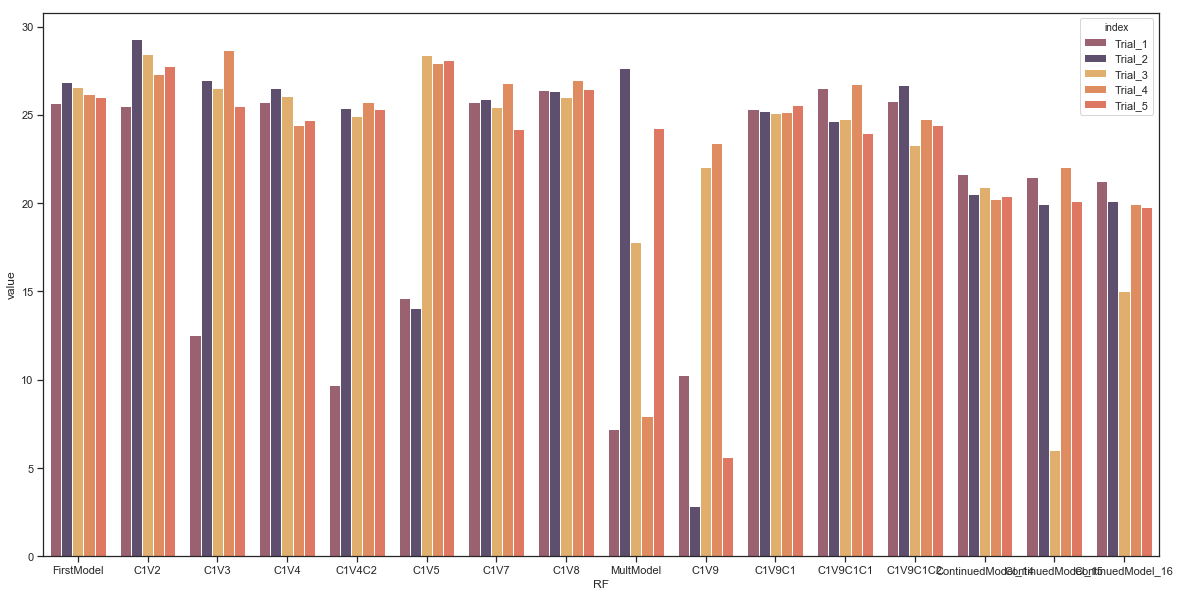

In [57]:
sns.set(rc={'figure.figsize':(20, 10)}) # original figsize: (15, 8.27)
sns.set_style("ticks")

current_palette = ["#A3586D", "#5C4A72", "#F3B05A", "#F4874B", "#F46A4E"]
sns.set_palette(current_palette)

eval_barplot = sns.barplot(x='RF', y='value', hue='index', data= eval_df.reset_index().melt(id_vars='index', var_name='RF'))

### Bar graph with max, min, and mean times for accurate trials of all models

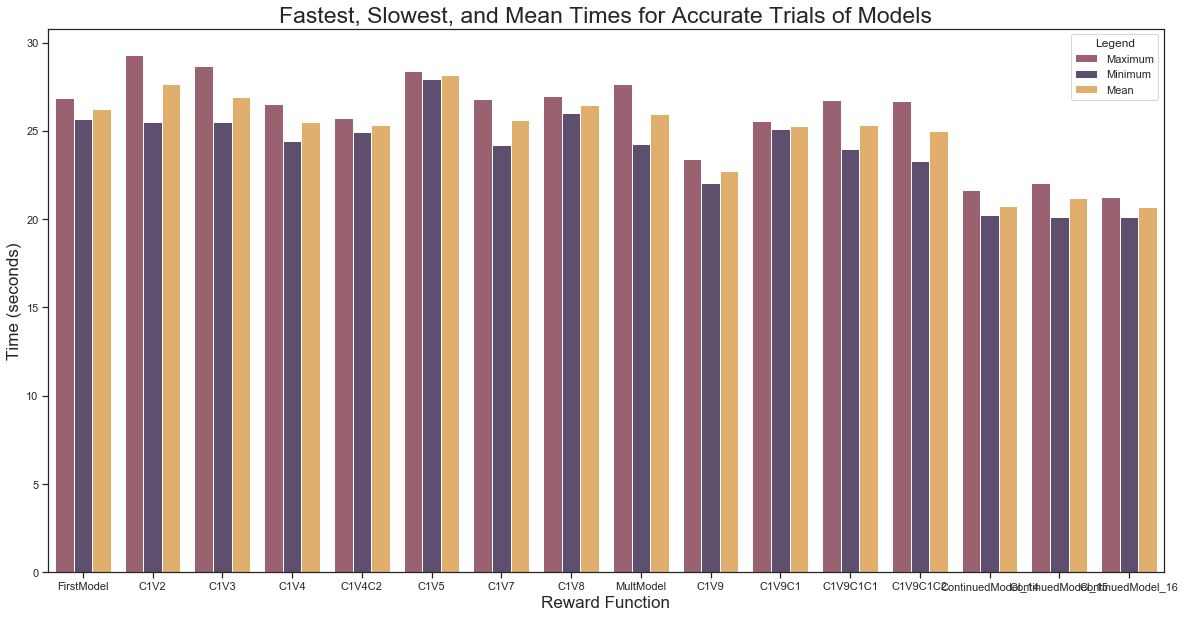

In [60]:
import statistics
# Boxplot only uses models that have 100% accuracy for all five trials
bar_df = eval_df.copy()
bar_row_count = 0
bar_col_count = 0
col_list = bar_df.columns

while bar_col_count < len(col_list):
    bar_row_count = 0
    while bar_row_count < len(bar_df):
        if bar_df[col_list[bar_col_count]][bar_row_count] < 20:
            bar_df[col_list[bar_col_count]][bar_row_count] = 0
        bar_row_count += 1
    bar_col_count += 1
    
bar_plot_df = pd.DataFrame()
bar_plot_row_count = 0
bar_plot_col_count = 0

while bar_plot_col_count < len(col_list):
    bar_plot_row_count = 0
    currList = []
    while bar_plot_row_count < len(bar_df):
        if bar_df[col_list[bar_plot_col_count]][bar_plot_row_count] >= 20:
            currList.append(bar_df[col_list[bar_plot_col_count]][bar_plot_row_count])
        bar_plot_row_count += 1
    bar_plot_df[col_list[bar_plot_col_count]] = [max(currList), min(currList), statistics.mean(currList)]
    bar_plot_col_count += 1

bar_plot_df.rename({0: 'Maximum', 1: 'Minimum', 2: 'Mean'}, axis='index', inplace = True)

stat_barplot = sns.barplot(x='RF', y='value', hue='index', data= bar_plot_df.reset_index().melt(id_vars='index', var_name='RF'))
stat_barplot.set_xlabel('Reward Function', fontsize = 17) 
stat_barplot.set_ylabel('Time (seconds)', fontsize = 17)
stat_barplot.set_title('Fastest, Slowest, and Mean Times for Accurate Trials of Models', fontsize = 23)

plt.legend(title='Legend')

### Boxplot for different hierarchies of models

In [61]:
bw_df = pd.DataFrame() # box and whisker plot dataframe
bw_row_count = 0
bw_col_count = 0
bw_col_list = eval_df.columns
valid_model = True

while bw_col_count < len(bw_col_list):
    valid_model = True
    bw_row_count = 0
    while bw_row_count < len(eval_df):
        if eval_df[col_list[bw_col_count]][bw_row_count] < 20:
            valid_model = False
        bw_row_count += 1
    if valid_model:
        bw_df[eval_df.columns[bw_col_count]] = eval_df[eval_df.columns[bw_col_count]]
    bw_col_count += 1

Text(0.5, 1.0, 'Distribution of Evaluation Times for Accurate Models Cloned from Initial Base Model')

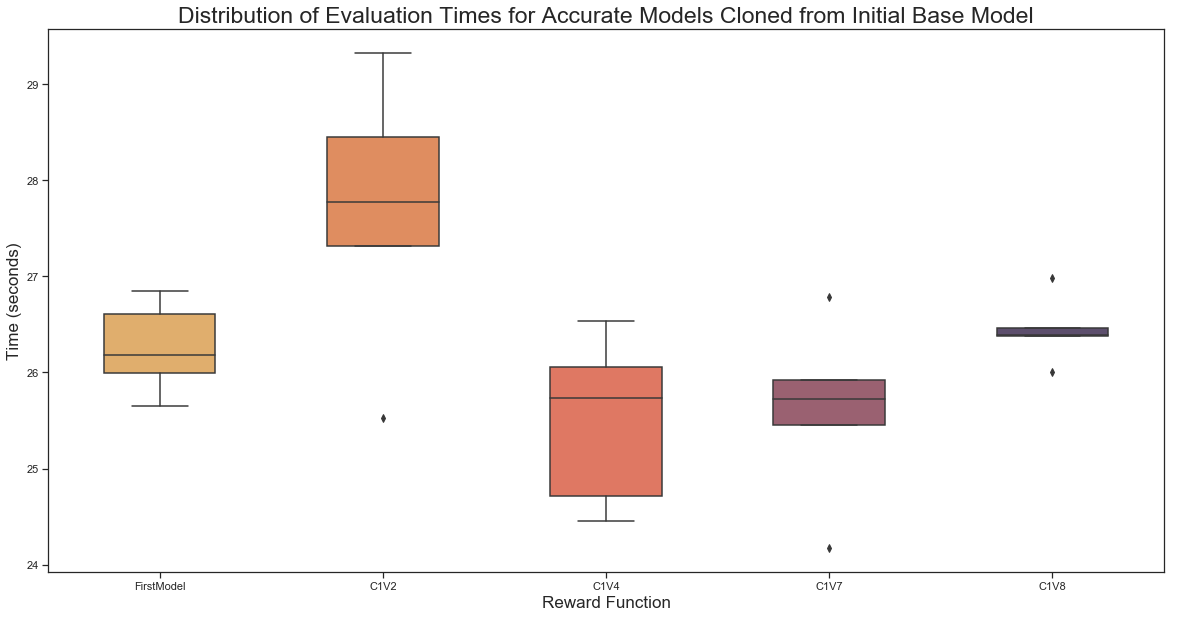

In [74]:
# change figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("ticks")
bw_df_boxplot = sns.boxplot(x='RF', y='value', data= bw_df[['FirstModel','C1V2','C1V4','C1V7','C1V8']].reset_index().melt(id_vars='index', var_name='RF'), width=0.5, palette = ["#F3B05A", "#F4874B", "#F46A4E", "#A3586D", "#5C4A72"])
bw_df_boxplot.set_xlabel('Reward Function', fontsize = 17) 
bw_df_boxplot.set_ylabel('Time (seconds)', fontsize = 17)
bw_df_boxplot.set_title('Distribution of Evaluation Times for Accurate Models Cloned from Initial Base Model', fontsize = 23)
# make y-axis start at 0
#bw_df_boxplot.set_ylim(0,30)

Text(0.5, 1.0, 'Distribution of Evaluation Times for Accurate RewardFunction_9 Models')

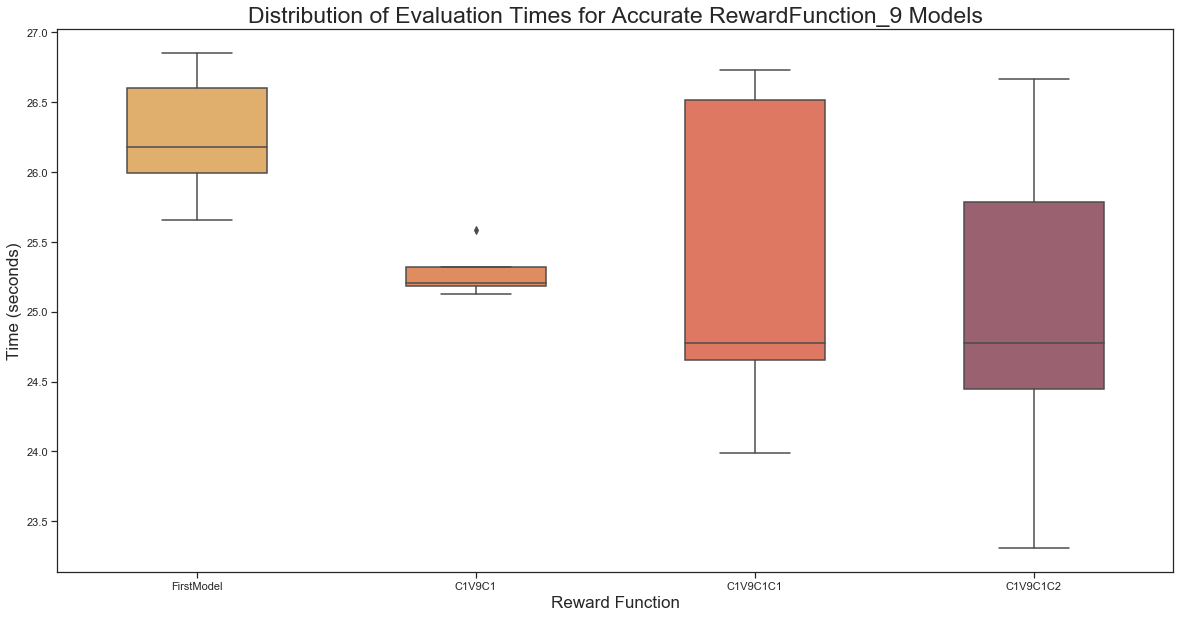

In [75]:
bw_df_boxplot = sns.boxplot(x='RF', y='value', data= eval_df[['FirstModel', 'C1V9C1','C1V9C1C1','C1V9C1C2']].reset_index().melt(id_vars='index', var_name='RF'), width=0.5, palette = ["#F3B05A", "#F4874B", "#F46A4E", "#A3586D", "#5C4A72"])
bw_df_boxplot.set_xlabel('Reward Function', fontsize = 17) 
bw_df_boxplot.set_ylabel('Time (seconds)', fontsize = 17)
bw_df_boxplot.set_title('Distribution of Evaluation Times for Accurate RewardFunction_9 Models', fontsize = 23)

[[Text(0, 0, 'Initial Model'),
  Text(0, 0, 'Triangle Waypoints Model'),
  Text(0, 0, 'Bezier Curves Model'),
  Text(0, 0, 'Vector Calculations Model')]]

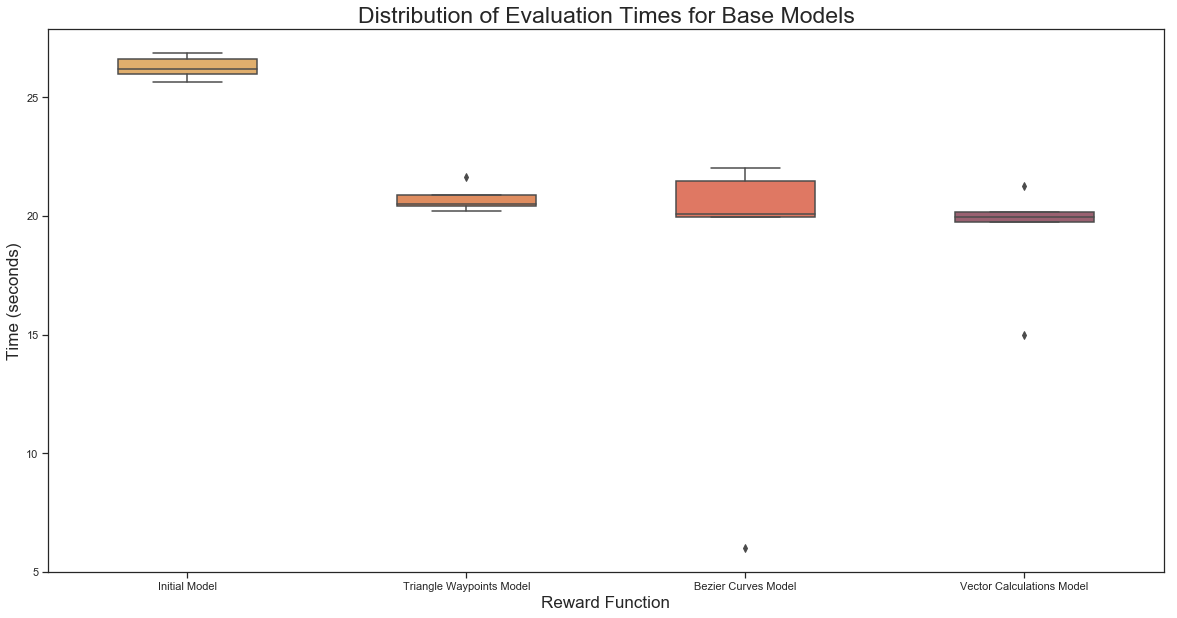

In [76]:
basemod_df_boxplot = sns.boxplot(x='RF', y='value', data= eval_df[['FirstModel','ContinuedModel_14', 'ContinuedModel_15', 'ContinuedModel_16']].reset_index().melt(id_vars='index', var_name='RF'), width=0.5, palette = ["#F3B05A", "#F4874B", "#F46A4E", "#A3586D", "#5C4A72"])
basemod_df_boxplot.set_xlabel('Reward Function', fontsize = 17) 
basemod_df_boxplot.set_ylabel('Time (seconds)', fontsize = 17)
basemod_df_boxplot.set_title('Distribution of Evaluation Times for Base Models', fontsize = 23)
basemod_df_boxplot.set(xticklabels=['Initial Model', 'Triangle Waypoints Model', 'Bezier Curves Model', 'Vector Calculations Model'])
#basemod_df_boxplot.set_ylim(18,28)